<a href="https://colab.research.google.com/github/SushantVij/NLP-CV-IOT-UCS657-/blob/main/102003759_NLP_in_Python_3_Sushant_Vij_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis

## Introduction

After the data cleaning step where we put our data into a few standard formats, the next step is to take a look at the data and see if what we're looking at makes sense. Before applying any fancy algorithms, it's always important to explore the data first.

When working with numerical data, some of the exploratory data analysis (EDA) techniques we can use include finding the average of the data set, the distribution of the data, the most common values, etc. The idea is the same when working with text data. We are going to find some more obvious patterns with EDA before identifying the hidden patterns with machines learning (ML) techniques. We are going to look at the following for each comedian:

1. **Most common words** - find these and create word clouds
2. **Size of vocabulary** - look number of unique words and also how quickly someone speaks
3. **Amount of profanity** - most common terms

## Most Common Words

### Analysis

In [ ]:
# Read in the document-term matrix
import pandas as pd

data = pd.read_pickle('dtm.pkl')
data = data.transpose()
data.head()

,s1e1,s1e2,s1e3,s1e4,s1e5,s1e6,s1e7,s1e8
aa,0,0,0,0,0,1,0,0
aapologiesplease,0,0,0,0,0,1,0,0
aare,1,0,0,0,0,0,0,0
aautograph,0,0,1,0,0,0,0,0
abandoning,0,0,0,0,0,0,0,1



is a dictionary that stores the top 30 words said by each comedian in data. The code sorts the values of each column in descending order and then stores the top 30 words and their corresponding values in a list. The list is then stored in the dictionary with the comedian's name as its key.



In [ ]:
# Find the top 30 words movies,tv series
top_dict = {}
for c in data.columns:
    top = data[c].sort_values(ascending=False).head(30)
    top_dict[c]= list(zip(top.index, top.values))

top_dict

{'s1e1': [('just', 30),
  ('know', 29),
  ('im', 27),
  ('dont', 24),
  ('got', 21),
  ('like', 21),
  ('mean', 19),
  ('gonna', 18),
  ('fucking', 16),
  ('want', 15),
  ('youre', 13),
  ('come', 13),
  ('think', 13),
  ('really', 12),
  ('thats', 12),
  ('hey', 11),
  ('look', 11),
  ('right', 10),
  ('uh', 9),
  ('little', 8),
  ('love', 8),
  ('hughie', 7),
  ('didnt', 7),
  ('ii', 7),
  ('actually', 7),
  ('good', 7),
  ('fuck', 7),
  ('wait', 7),
  ('tell', 7),
  ('yeah', 7)],
 's1e2': [('know', 33),
  ('fucking', 30),
  ('just', 22),
  ('got', 22),
  ('dont', 17),
  ('im', 17),
  ('gonna', 15),
  ('like', 14),
  ('need', 13),
  ('think', 13),
  ('fuck', 12),
  ('right', 12),
  ('uh', 11),
  ('really', 10),
  ('come', 10),
  ('youre', 10),
  ('want', 8),
  ('doing', 7),
  ('ill', 7),
  ('wait', 7),
  ('thats', 7),
  ('did', 7),
  ('kill', 7),
  ('tell', 7),
  ('whoa', 7),
  ('hes', 7),
  ('look', 7),
  ('love', 7),
  ('yeah', 6),
  ('little', 6)],
 's1e3': [('just', 33),
  ('got'


This code prints the top 15 words said by each comedian. It iterates through the top_dict dictionary, printing the comedian's name and then a list of the top 15 words said by that comedian separated by commas. It then prints a line of dashes to



In [ ]:
# Print the top 15 words said by each comedian
for comedian, top_words in top_dict.items():
    print(comedian)
    print(', '.join([word for word, count in top_words[0:14]]))
    print('---')

s1e1
just, know, im, dont, got, like, mean, gonna, fucking, want, youre, come, think, really
---
s1e2
know, fucking, just, got, dont, im, gonna, like, need, think, fuck, right, uh, really
---
s1e3
just, got, know, right, dont, yeah, im, like, gonna, come, youre, want, good, need
---
s1e4
know, just, dont, like, gonna, fucking, right, really, thats, got, yeah, youre, im, didnt
---
s1e5
know, dont, im, just, fucking, mean, got, yeah, want, come, tell, like, think, sorry
---
s1e6
know, just, dont, fucking, like, im, want, right, little, uh, gonna, got, good, think
---
s1e7
know, dont, fucking, got, just, right, gonna, want, im, like, mean, did, yeah, fuck
---
s1e8
fucking, know, just, dont, im, okay, got, gonna, youre, like, want, mean, right, did
---


**NOTE:** At this point, we could go on and create word clouds. However, by looking at these top words, you can see that some of them have very little meaning and could be added to a stop words list, so let's do just that.




# Now let's aggregate this list and identify the most common words along with how many routines they occur in
Counter(words).most_common()

This code is creating a list of the most common words used by each comedian and then counting the number of times each word appears. The output



In [ ]:
# Look at the most common top words --> add them to the stop word list
from collections import Counter

# Let's first pull out the top 30 words for each comedian
words = []
for comedian in data.columns:
    top = [word for (word, count) in top_dict[comedian]]
    for t in top:
        words.append(t)
        
words

['just',
 'know',
 'im',
 'dont',
 'got',
 'like',
 'mean',
 'gonna',
 'fucking',
 'want',
 'youre',
 'come',
 'think',
 'really',
 'thats',
 'hey',
 'look',
 'right',
 'uh',
 'little',
 'love',
 'hughie',
 'didnt',
 'ii',
 'actually',
 'good',
 'fuck',
 'wait',
 'tell',
 'yeah',
 'know',
 'fucking',
 'just',
 'got',
 'dont',
 'im',
 'gonna',
 'like',
 'need',
 'think',
 'fuck',
 'right',
 'uh',
 'really',
 'come',
 'youre',
 'want',
 'doing',
 'ill',
 'wait',
 'thats',
 'did',
 'kill',
 'tell',
 'whoa',
 'hes',
 'look',
 'love',
 'yeah',
 'little',
 'just',
 'got',
 'know',
 'right',
 'dont',
 'yeah',
 'im',
 'like',
 'gonna',
 'come',
 'youre',
 'want',
 'good',
 'need',
 'new',
 'mean',
 'fucking',
 'thats',
 'hey',
 'think',
 'really',
 'stop',
 'make',
 'did',
 'okay',
 'look',
 'hes',
 'uh',
 'hell',
 'love',
 'know',
 'just',
 'dont',
 'like',
 'gonna',
 'fucking',
 'right',
 'really',
 'thats',
 'got',
 'yeah',
 'youre',
 'im',
 'didnt',
 'mean',
 'come',
 'fuck',
 'lets',
 'ok


This code uses the Counter() function from the collections module to count the number of occurrences of each word in a list called 'words'. The most_common() method is then used to identify the most common words and how many times they occur.



In [ ]:
# Let's aggregate this list and identify the most common words along with how many routines they occur in
Counter(words).most_common()

[('just', 8),
 ('know', 8),
 ('im', 8),
 ('dont', 8),
 ('got', 8),
 ('like', 8),
 ('gonna', 8),
 ('fucking', 8),
 ('want', 8),
 ('youre', 8),
 ('really', 8),
 ('right', 8),
 ('yeah', 8),
 ('mean', 7),
 ('come', 7),
 ('think', 7),
 ('thats', 7),
 ('little', 7),
 ('did', 7),
 ('good', 6),
 ('fuck', 6),
 ('tell', 6),
 ('need', 6),
 ('hey', 5),
 ('okay', 5),
 ('look', 4),
 ('uh', 4),
 ('love', 4),
 ('didnt', 4),
 ('wait', 3),
 ('hes', 3),
 ('doing', 2),
 ('stop', 2),
 ('lets', 2),
 ('say', 2),
 ('sorry', 2),
 ('oh', 2),
 ('shit', 2),
 ('hughie', 1),
 ('ii', 1),
 ('actually', 1),
 ('ill', 1),
 ('kill', 1),
 ('whoa', 1),
 ('new', 1),
 ('make', 1),
 ('hell', 1),
 ('yes', 1),
 ('follow', 1),
 ('shes', 1),
 ('said', 1),
 ('believe', 1),
 ('talk', 1),
 ('flight', 1),
 ('ask', 1),
 ('seen', 1),
 ('going', 1),
 ('doesnt', 1),
 ('baby', 1),
 ('youi', 1),
 ('meyou', 1),
 ('compound', 1)]


is a list comprehension that takes the words from the Counter object and counts the number of times each word appears. If a word appears more than 6 times, it is added to the list add_stop_words. This means that if more than half of the comedians have it as a top word, it will be excluded from the list.



In [ ]:
# If more than half of the comedians have it as a top word, exclude it from the list
add_stop_words = [word for word, count in Counter(words).most_common() if count > 6]
add_stop_words

['just',
 'know',
 'im',
 'dont',
 'got',
 'like',
 'gonna',
 'fucking',
 'want',
 'youre',
 'really',
 'right',
 'yeah',
 'mean',
 'come',
 'think',
 'thats',
 'little',
 'did']


This code is updating a document-term matrix (DTM) with a new list of stop words. It first reads in the cleaned data, adds new stop words to the existing English stop words, recreates the DTM using the new list of stop words, and then pickles it for later use.



In [ ]:
# Let's update our document-term matrix with the new list of stop words
from sklearn.feature_extraction import text 
from sklearn.feature_extraction.text import CountVectorizer

# Read in cleaned data
data_clean = pd.read_pickle('data_clean.pkl')

# Add new stop words
stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)

# Recreate document-term matrix
cv = CountVectorizer(stop_words=stop_words)
data_cv = cv.fit_transform(data_clean.transcript)
data_stop = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names_out())
data_stop.index = data_clean.index

# Pickle it for later use
import pickle
pickle.dump(cv, open("cv_stop.pkl", "wb"))
data_stop.to_pickle("dtm_stop.pkl")


This code is installing the WordCloud library from the conda-forge repository. The WordCloud object is then being initialized with the specified parameters, such as stopwords, background color, colormap, maximum font size and a random state.



In [ ]:
# Let's make some word clouds!
# Terminal / Anaconda Prompt: conda install -c conda-forge wordcloud
from wordcloud import WordCloud

wc = WordCloud(stopwords=stop_words, background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42)


This code is used to create a word cloud for each of the 12 comedians listed in the full_names list. The plt.rcParams['figure.figsize'] = [16, 6] line resets the output dimensions of the figure to 16 inches wide and 6 inches tall. Then, a for loop is used to generate a word cloud for each comedian in the data.columns list and plot it in a 3x4 grid with the corresponding title from full_names. Finally, plt.show() is used to display all of the word clouds in one figure.



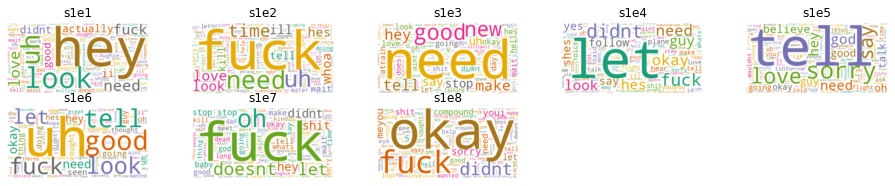

In [ ]:
# Reset the output dimensions
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [16, 6]

full_names = ['s1e1','s1e2','s1e3','s1e4','s1e5','s1e6','s1e7','s1e8']

# Create subplots for each comedian
for index, comedian in enumerate(data.columns):
    wc.generate(data_clean.transcript[comedian])
    
    plt.subplot(4, 5, index+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(full_names[index])
    
plt.show()

### Findings

* Ali Wong says the s-word a lot and talks about her husband. I guess that's funny to me.
* A lot of people use the F-word. Let's dig into that later.

## Number of Words

### Analysis


This code creates a list of unique values from the data set. It iterates through each column in the data set and uses the .to_numpy() method to convert the data into an array. The .nonzero()[0] method is then used to find all non-zero elements in the array and the .size attribute is used to count how many unique values there are in each column. The unique value count for each column is then appended to the unique_list list.




This code creates a dataframe from two lists, full_names and unique_list. The dataframe has two columns, 'comedian' and 'unique_words'. It then sorts the dataframe by the 'unique_words' column in ascending order.



In [ ]:
# Find the number of unique words that each comedian uses

# Identify the non-zero items in the document-term matrix, meaning that the word occurs at least once
unique_list = []
for comedian in data.columns:
    uniques = data[comedian].to_numpy().nonzero()[0].size
    unique_list.append(uniques)

# Create a new dataframe that contains this unique word count
data_words = pd.DataFrame(list(zip(full_names, unique_list)), columns=['comedian', 'unique_words'])
data_unique_sort = data_words.sort_values(by='unique_words')
data_unique_sort

,comedian,unique_words
3,s1e4,1463
7,s1e8,1523
6,s1e7,1548
2,s1e3,1587
4,s1e5,1632
1,s1e2,1742
0,s1e1,1793
5,s1e6,2009



This code calculates the words per minute of each comedian by first finding the total number of words used by each comedian and then dividing that number by the run time of their comedy special. The data is then sorted to see who talks the slowest and fastest.



In [ ]:
# Calculate the words per minute of each comedian

# Find the total number of words that a comedian uses
total_list = []
for comedian in data.columns:
    totals = sum(data[comedian])
    total_list.append(totals)
print(total_list)
    
# Comedy special run times from IMDB, in minutes
run_times = [2487, 2362, 2243, 2021, 2316, 2775, 2203, 2164]

# Let's add some columns to our dataframe
data_words['total_words'] = total_list
data_words['run_times'] = run_times
data_words['words_per_minute'] = data_words['total_words'] / data_words['run_times']

# Sort the dataframe by words per minute to see who talks the slowest and fastest
data_wpm_sort = data_words.sort_values(by='words_per_minute')
data_wpm_sort

[2487, 2362, 2243, 2021, 2316, 2775, 2203, 2164]


,comedian,unique_words,total_words,run_times,words_per_minute
0,s1e1,1793,2487,2487,1.0
1,s1e2,1742,2362,2362,1.0
2,s1e3,1587,2243,2243,1.0
3,s1e4,1463,2021,2021,1.0
4,s1e5,1632,2316,2316,1.0
5,s1e6,2009,2775,2775,1.0
6,s1e7,1548,2203,2203,1.0
7,s1e8,1523,2164,2164,1.0



This code is plotting two bar graphs side by side. The first graph is a bar graph of the number of unique words for each comedian, and the second graph is a bar graph of the number of words per minute for each comedian. The x-axis of both graphs is the number of words or words per minute, and the y-axis is the comedians' names.



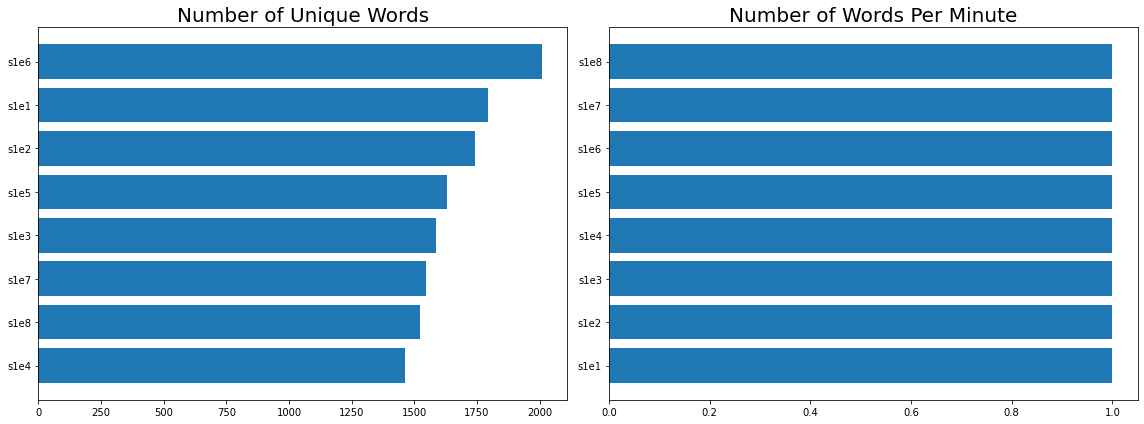

In [ ]:
# Let's plot our findings
import numpy as np

y_pos = np.arange(len(data_words))

plt.subplot(1, 2, 1)
plt.barh(y_pos, data_unique_sort.unique_words, align='center')
plt.yticks(y_pos, data_unique_sort.comedian)
plt.title('Number of Unique Words', fontsize=20)

plt.subplot(1, 2, 2)
plt.barh(y_pos, data_wpm_sort.words_per_minute, align='center')
plt.yticks(y_pos, data_wpm_sort.comedian)
plt.title('Number of Words Per Minute', fontsize=20)

plt.tight_layout()
plt.show()

### Findings

* **Vocabulary**
   * Ricky Gervais (British comedy) and Bill Burr (podcast host) use a lot of words in their comedy
   * Louis C.K. (self-depricating comedy) and Anthony Jeselnik (dark humor) have a smaller vocabulary


* **Talking Speed**
   * Joe Rogan (blue comedy) and Bill Burr (podcast host) talk fast
   * Bo Burnham (musical comedy) and Anthony Jeselnik (dark humor) talk slow
   
Ali Wong is somewhere in the middle in both cases. Nothing too interesting here.

## Amount of Profanity

### Analysis


This code uses the Counter() function from the collections module to count the number of occurrences of each word in the list of words called 'words'. The most_common() method is then used to return a list of tuples containing each word and its corresponding count, sorted in descending order by count.



In [ ]:
# Earlier I said we'd revisit profanity. Let's take a look at the most common words again.
Counter(words).most_common()

[('just', 8),
 ('know', 8),
 ('im', 8),
 ('dont', 8),
 ('got', 8),
 ('like', 8),
 ('gonna', 8),
 ('fucking', 8),
 ('want', 8),
 ('youre', 8),
 ('really', 8),
 ('right', 8),
 ('yeah', 8),
 ('mean', 7),
 ('come', 7),
 ('think', 7),
 ('thats', 7),
 ('little', 7),
 ('did', 7),
 ('good', 6),
 ('fuck', 6),
 ('tell', 6),
 ('need', 6),
 ('hey', 5),
 ('okay', 5),
 ('look', 4),
 ('uh', 4),
 ('love', 4),
 ('didnt', 4),
 ('wait', 3),
 ('hes', 3),
 ('doing', 2),
 ('stop', 2),
 ('lets', 2),
 ('say', 2),
 ('sorry', 2),
 ('oh', 2),
 ('shit', 2),
 ('hughie', 1),
 ('ii', 1),
 ('actually', 1),
 ('ill', 1),
 ('kill', 1),
 ('whoa', 1),
 ('new', 1),
 ('make', 1),
 ('hell', 1),
 ('yes', 1),
 ('follow', 1),
 ('shes', 1),
 ('said', 1),
 ('believe', 1),
 ('talk', 1),
 ('flight', 1),
 ('ask', 1),
 ('seen', 1),
 ('going', 1),
 ('doesnt', 1),
 ('baby', 1),
 ('youi', 1),
 ('meyou', 1),
 ('compound', 1)]


This code takes a data set and isolates the columns containing the words "fucking", "fuck", and "shit". It then adds the values from the columns containing "fucking" and "fuck" together, and creates a new column called "f_word" which contains the sum of those two columns. It also creates a new column called "s_word" which contains the values from the column containing "shit". Finally, it creates a new data set called data_profanity which contains these two new columns.



In [ ]:
# Let's isolate just these bad words
data_bad_words = data.transpose()[['fucking', 'fuck', 'shit']]
#data_bad_words
data_profanity = pd.concat([data_bad_words.fucking + data_bad_words.fuck, data_bad_words.shit], axis=1)
data_profanity.columns = ['f_word', 's_word']
data_profanity

,f_word,s_word
s1e1,23,2
s1e2,42,3
s1e3,11,4
s1e4,27,5
s1e5,22,2
s1e6,36,3
s1e7,39,8
s1e8,42,6



This code creates a scatter plot of the number of profane words used in a routine by different comedians. It takes the data from the data_profanity variable and assigns x and y values for each comedian. It then plots these points on a scatter plot, labels each point with the comedian's name, sets the x-axis limit to -5 to 155, adds a title and labels for the x- and y-axes, and finally displays the plot.



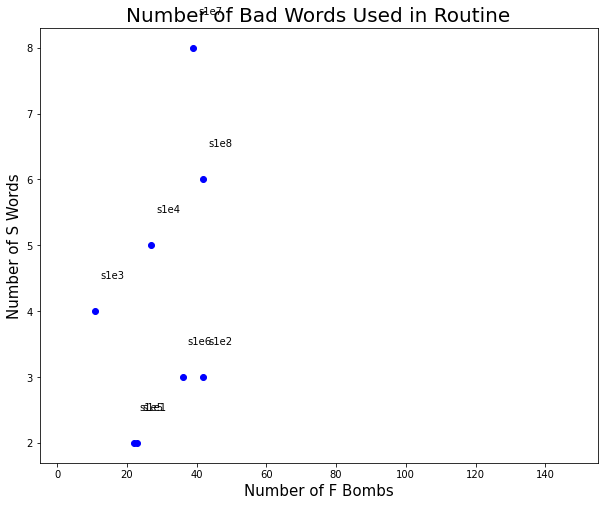

In [ ]:
# Let's create a scatter plot of our findings
plt.rcParams['figure.figsize'] = [10, 8]

for i, comedian in enumerate(data_profanity.index):
    x = data_profanity.f_word.loc[comedian]
    y = data_profanity.s_word.loc[comedian]
    plt.scatter(x, y, color='blue')
    plt.text(x+1.5, y+0.5, full_names[i], fontsize=10)
    plt.xlim(-5, 155) 
    
plt.title('Number of Bad Words Used in Routine', fontsize=20)
plt.xlabel('Number of F Bombs', fontsize=15)
plt.ylabel('Number of S Words', fontsize=15)

plt.show()

### Findings

* **Averaging 2 F-Bombs Per Minute!** - I don't like too much swearing, especially the f-word, which is probably why I've never heard of Bill Bur, Joe Rogan and Jim Jefferies.
* **Clean Humor** - It looks like profanity might be a good predictor of the type of comedy I like. Besides Ali Wong, my two other favorite comedians in this group are John Mulaney and Mike Birbiglia.

## Side Note

What was our goal for the EDA portion of our journey? **To be able to take an initial look at our data and see if the results of some basic analysis made sense.**

My conclusion - yes, it does, for a first pass. There are definitely some things that could be better cleaned up, such as adding more stop words or including bi-grams. But we can save that for another day. The results, especially the profanity findings, are interesting and make general sense, so we're going to move on.

As a reminder, the data science process is an interative one. It's better to see some non-perfect but acceptable results to help you quickly decide whether your project is a dud or not, instead of having analysis paralysis and never delivering anything.

**Alice's data science (and life) motto: Let go of perfectionism!**

## Additional Exercises

1. What other word counts do you think would be interesting to compare instead of the f-word and s-word? Create a scatter plot comparing them.


= data.transpose()[['love','life' ,'hate','death','hell']]

This code takes the data, transposes it, and then creates a new variable called data_bad_words that contains only the columns with the labels 'love', 'life', 'hate', 'death', and 'hell'.



In [ ]:
data_bad_words = data.transpose()[['fucking','shit', 'compound', 'baby']]
data_bad_words

,fucking,shit,compound,baby
s1e1,16,2,3,0
s1e2,30,3,1,2
s1e3,10,4,1,3
s1e4,18,5,2,2
s1e5,20,2,2,4
s1e6,27,3,4,0
s1e7,26,8,2,7
s1e8,33,6,7,2



This code creates a new dataframe called data_profanity by combining the columns from another dataframe called data_bad_words. The columns that are combined are 'love' and 'life', as well as 'hate', 'death', and 'hell'. The new dataframe is then given two column names, 'p_word' and 'n_word'. Finally, the new dataframe is printed.



In [ ]:
data_profanity = pd.concat([data_bad_words.fucking + data_bad_words.shit, data_bad_words.compound + data_bad_words.baby ], axis=1)
data_profanity.columns = ['p_word', 'n_word']
data_profanity

,p_word,n_word
s1e1,18,3
s1e2,33,3
s1e3,14,4
s1e4,23,4
s1e5,22,6
s1e6,30,4
s1e7,34,9
s1e8,39,9



This code creates a scatter plot of data from the data_profanity dataframe. It plots the number of P words and N words for each comedian in the dataframe, indicated by their full names. The plot is labeled with a title and axes labels, and has a size of 10x8.



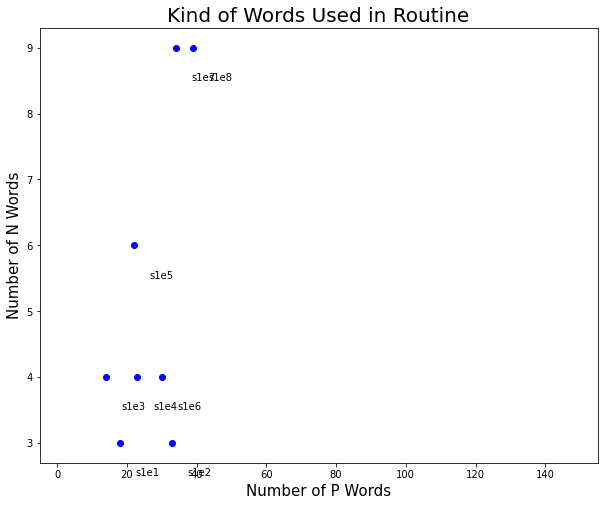

In [ ]:
# Let's create a scatter plot of our findings
plt.rcParams['figure.figsize'] = [10, 8]

for i, comedian in enumerate(data_profanity.index):
    x = data_profanity.p_word.loc[comedian]
    y = data_profanity.n_word.loc[comedian]
    plt.scatter(x, y, color='blue')
    plt.text(x+4.5, y-0.5, full_names[i], fontsize=10)
    plt.xlim(-5, 155) 
    
plt.title('Kind of Words Used in Routine', fontsize=20)
plt.xlabel('Number of P Words', fontsize=15)
plt.ylabel('Number of N Words', fontsize=15)

plt.show()


This code isolates the words 'im', 'ill', 'id', 'ive', 'hes', 'shes', 'theyre', and 'theyve' from the data and stores them in a new variable called data_words. It does not include the code to concatenate two columns, so that part of the code is commented out. The last line of code renames the columns of data_profanity to be 'f_word' and 's_word'.



In [ ]:
# Let's isolate just these bad words
data_words = data.transpose()[['im','ill','id','ive','hes','shes','theyre','theyve']]
data_words
data_person_sense = pd.concat([data_words.im , data_bad_words.shit], axis=1)
data_profanity.columns = ['f_word', 's_word']
data_profanity

,f_word,s_word
s1e1,18,3
s1e2,33,3
s1e3,14,4
s1e4,23,4
s1e5,22,6
s1e6,30,4
s1e7,34,9
s1e8,39,9



This code takes a data set and creates a new data set called dark_comedy. It does this by first transposing the original data set, then selecting the columns 'angry', 'fight', 'romantic', 'confident', 'idiot', 'porn', 'slut', 'tits', 'sex', 'fuck' and 'gay'. It then concatenates two columns together, one containing the sum of the values in the columns previously mentioned, and another containing the sum of the values in the remaining columns. The two columns are then given labels of l_humour and d_humour respectively. The resulting data set is called dark_comedy.



In [ ]:
data_words = data.transpose()[['angry','fight','romantic','idiot','porn','sex','fuck','gay']]
data_words
dark_comedy = pd.concat([data_words.angry + data_words.fight + data_words.romantic + data_words.idiot, data_words.porn  + data_words.sex + data_words.fuck + data_words.gay], axis=1)
dark_comedy.columns = ['l_humour', 'd_humour']
dark_comedy 

,l_humour,d_humour
s1e1,1,9
s1e2,1,12
s1e3,1,1
s1e4,1,10
s1e5,0,3
s1e6,2,9
s1e7,0,13
s1e8,3,9



This code creates a scatter plot of the findings from the dark_comedy dataset. It sets the figure size to 10x8, then for each comedian in the dark_comedy dataset, it plots their l_humour and d_humour values as a point on the graph. It also adds their name to each point using the full_names list. The x-axis is limited to -5 to 155 and titles and labels are added to the graph. Finally, it displays the graph.



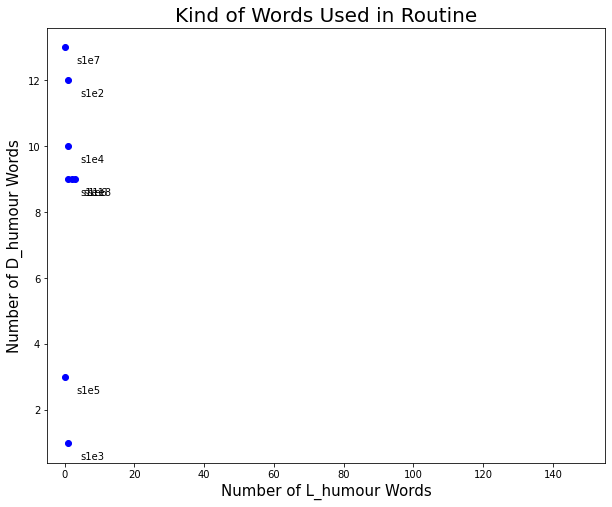

In [ ]:
# Let's create a scatter plot of our findings
plt.rcParams['figure.figsize'] = [10, 8]

for i, comedian in enumerate(dark_comedy.index):
    x = dark_comedy.l_humour.loc[comedian]
    y = dark_comedy.d_humour.loc[comedian]
    plt.scatter(x, y, color='blue')
    plt.text(x+3.5, y-0.5, full_names[i], fontsize=10)
    plt.xlim(-5, 155) 
    
plt.title('Kind of Words Used in Routine', fontsize=20)
plt.xlabel('Number of L_humour Words', fontsize=15)
plt.ylabel('Number of D_humour Words', fontsize=15)

plt.show()